# Chapter 11 Assignment: Neural nets (NN)

### Read Chapter 11 of DMBA and review relevant resources in Module - Chapter 11 Neural Nets before starting this assignment. Provide your answers to all problems below, save this Jupyter notebook (.ipynb file), and then submit it along with your Excel worksheet in Canvas by the due date.

In [1]:
# Import required packages for this chapter
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from dmba import classificationSummary, gainsChart, liftChart, plotDecisionTree
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import matplotlib.pylab as plt

from dmba import classificationSummary, regressionSummary

%matplotlib inline

In [2]:
# Working directory:
# If you keep your data in a different folder, replace the argument of the `Path`
# DATA = Path('/Users/user/data/dmba/')
DATA = Path('C:\\Users\\tanve\\Documents\\206\\dmba\\')
# and then load data using 
# pd.read_csv(DATA / ‘filename.csv’)

# 1: Credit Card Use.

Consider the hypothetical bank data in Table 11.7 of the DMBA textbook on consumers’ use of credit card credit facilities. Create a small worksheet in Excel to illustrate one pass through a simple neural network (Randomly generate initial weight values)

_Years: number of years the customer has been with the bank_

_Salary: customer’s salary (in thousands of dollars)_

_Used Credit:<br> 
1 = customer has left an unpaid credit card balance at the end of at least one month in the prior year, <br>
0 = balance was paid off at the end of each month_
<p>
Upload your Excel worksheet via canvas submission.

# 2: Neural Net Evolution. 

A neural net typically starts out with random coeffcients; hence, it produces essentially random predictions when presented with its first case. What is the key ingredient by which the net evolves to produce a more accurate prediction?

Error and learning rate work together to modify weights and bias values as the midel runs through its epocs.  

# 3: Direct Mailing to Airline Customers.

East-West Airlines has entered into a partnership with the wireless phone company Telcon to sell the latter’s service via direct mail. The file _EastWestAirlinesNN.csv_ contains a subset of a data sample of who has already received a test oﬀer. About 13% accepted.

You are asked to develop a model to classify East–West customers as to whether they purchase a wireless phone service contract (outcome variable Phone_Sale). This model will be used to classify additional customers.

Review the <a href="https://www.thecasesolutions.com/project-data-mining-on-east-west-airlines-65598">Data Dictionary</a> first to understand the data.

You will need <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier">sklearn.neural_network.MLPClassifier</a> so review this documentation first. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>


In [3]:
# load the data
airline_df = pd.read_csv(DATA / 'EastWestAirlinesNN.csv')
airline_df = airline_df.dropna()
airline_df

,ID#,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,1.0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,5004.0,0.0,227.0,0.0,1.0,0.0,0.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4981,5005.0,0.0,3620.0,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4982,5006.0,0.0,10013.0,2436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,5007.0,0.0,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


__a.__ Run a neural net model on these data, using a single hidden layer with five nodes. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer. Remember to first convert categorical variables into dummies and scale numerical predictor variables to a 0–1 (use the scikit-learn transformer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler() </a> (also see Chapter 2.4 of DMBA).<p>
Use the training data to learn the transformation (see Table 7.2 in DMBA) rescaling the entire data (numerical variables only) to [0, 1] via "clip=True" in: <p>
scaleInput = MinMaxScaler(feature_range=(0, 1), clip=True)<p>
clip=True to clip transformed values of held-out data to provided feature range<p>
Do not scale binary dummy variables. Create a decile-wise lift chart for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.

In [4]:
nonDummy = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Online_12']
airline_df = airline_df.drop(columns='ID#')
outcome = 'Phone_sale'
predictors = airline_df.drop(columns=outcome).columns
airline_df

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,0.0,227.0,0.0,1.0,0.0,0.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4981,0.0,3620.0,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4982,0.0,10013.0,2436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,0.0,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
X = airline_df[predictors]
y = airline_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [7]:
################# Normalization ##########################3
minMaxPos = MinMaxScaler(feature_range=(0, 1), clip=True)
minMaxFull = MinMaxScaler(feature_range=(-1, 1), clip=True)
X_scaled_train = train_X
X_scaled_valid = valid_X
X_scaled_train[nonDummy] = minMaxPos.fit_transform(train_X[nonDummy])
X_scaled_valid[nonDummy] = minMaxPos.transform(valid_X[nonDummy])
# np.append(X_scaled_train, train_X.drop(columns=nonDummy))
# np.append(X_scaled_valid, valid_X.drop(columns = nonDummy))

#X_scaled_train

In [8]:
X_scaled_valid

,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo
2816,0.0,0.025117,0.0,1.0,0.0,0.0,0.050106,0.147727,0.000000,0.000000,0.0,0.0,0.0,1.0
4190,0.0,0.007493,0.0,1.0,0.0,0.0,0.023696,0.034091,0.000000,0.000000,0.0,1.0,0.0,1.0
1404,1.0,0.083673,0.0,0.0,0.0,0.0,0.014309,0.102273,0.107084,0.169811,0.0,1.0,0.0,0.0
3891,0.0,0.065813,0.0,1.0,0.0,0.0,0.080662,0.159091,0.000000,0.000000,0.0,1.0,0.0,1.0
372,0.0,0.073463,0.0,1.0,0.0,0.0,0.271718,0.306818,0.000000,0.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,0.0,0.004726,0.0,1.0,0.0,0.0,0.120340,0.159091,0.000000,0.000000,0.0,1.0,0.0,1.0
4694,0.0,0.000765,0.0,0.0,0.0,0.0,0.004336,0.011364,0.000000,0.000000,0.0,1.0,0.0,0.0
1167,0.0,0.035446,0.0,0.0,0.0,0.0,0.007046,0.034091,0.016225,0.018868,0.0,1.0,0.0,0.0
1221,0.0,0.044165,0.0,1.0,0.0,0.0,0.227417,0.215909,0.004867,0.018868,0.0,1.0,0.0,1.0


In [11]:
Airline_NN_logistic = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
Airline_NN_logistic.fit(X_scaled_train, train_y)
#clf.predict(valid_X)
Airline_NN_relu = MLPClassifier(hidden_layer_sizes=(5),  activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
Airline_NN_relu.fit(X_scaled_train, train_y)

MLPClassifier(hidden_layer_sizes=5, max_iter=10000, random_state=1,
              solver='lbfgs')

In [12]:
classificationSummary(train_y, Airline_NN_logistic.predict(X_scaled_train))
classificationSummary(valid_y, Airline_NN_logistic.predict(X_scaled_valid))

Confusion Matrix (Accuracy 0.8773)

       Prediction
Actual    0    1
     0 2609    4
     1  363   15
Confusion Matrix (Accuracy 0.8586)

       Prediction
Actual    0    1
     0 1705   12
     1  270    7


In [27]:
classificationSummary(train_y, Airline_NN_relu.predict(X_scaled_train))
classificationSummary(valid_y, Airline_NN_relu.predict(X_scaled_valid))

Confusion Matrix (Accuracy 0.8763)

       Prediction
Actual    0    1
     0 2610    3
     1  367   11
Confusion Matrix (Accuracy 0.8591)

       Prediction
Actual    0    1
     0 1709    8
     1  273    4


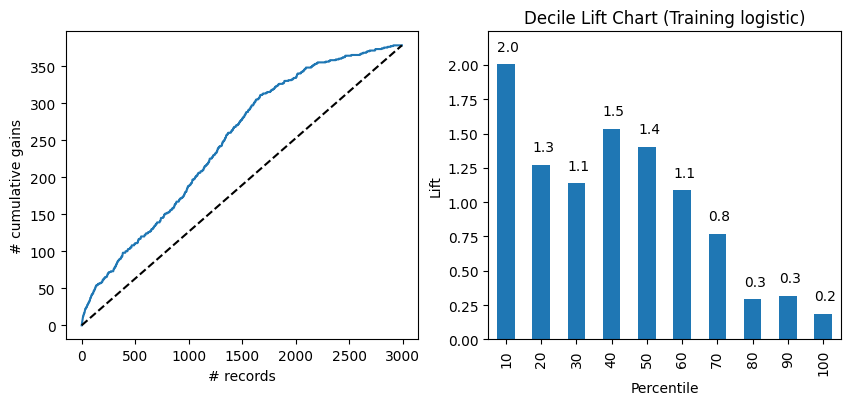

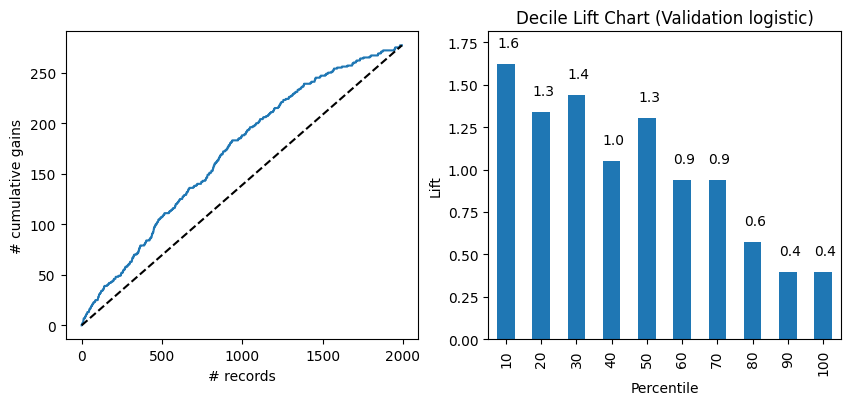

In [22]:
proba = Airline_NN_logistic.predict_proba(X_scaled_train)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_NN_logistic.predict(X_scaled_train) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Training logistic)')
plt.show()
proba = Airline_NN_logistic.predict_proba(X_scaled_valid)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_NN_logistic.predict(X_scaled_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation logistic)')
plt.show()

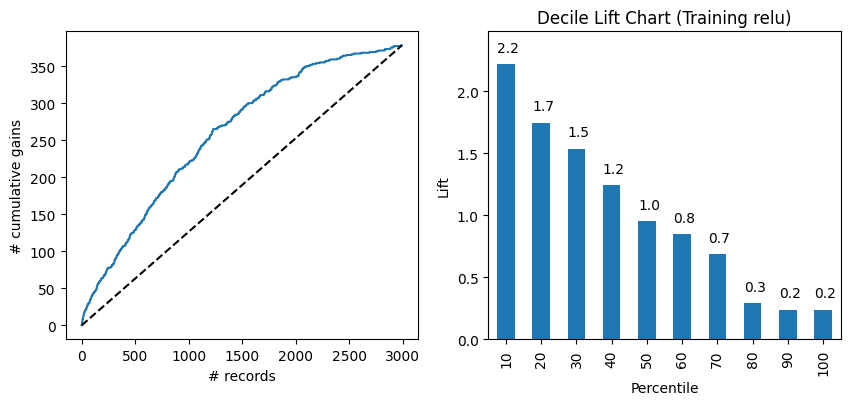

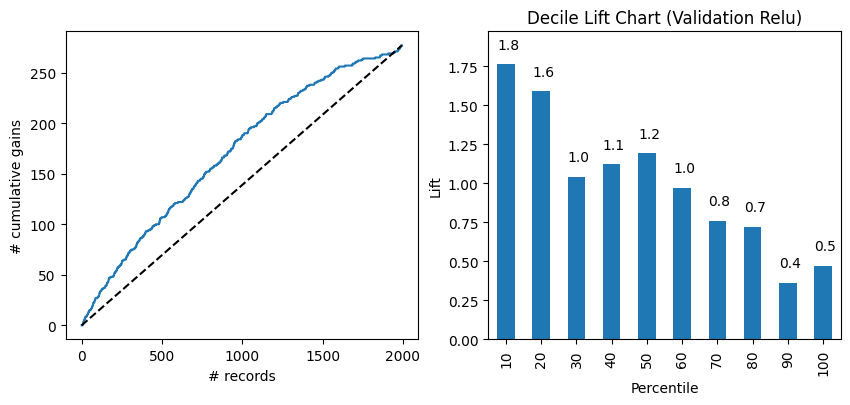

In [21]:

proba = Airline_NN_relu.predict_proba(X_scaled_train)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_NN_relu.predict(X_scaled_train) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Training relu)')
plt.show()
proba = Airline_NN_relu.predict_proba(X_scaled_valid)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_NN_relu.predict(X_scaled_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation Relu)')
plt.show()

The leftmost entry of the shows us by what magnitude the top 10% of records most likey to result in a phone sale are to result in a phone sale. 
EX. in the Decile lift chart for Validation set using relu, the top 10% of people most likely to get the phone service are 1.8 times as likley to get it. 

__b.__ Comment on the diﬀerence between the training and validation lift charts.

The lift in training sets is more concentrated in the first decile while the validation set has it spread out more. This can be due to ythe fact the model was created off of teh training set so its a bit more tuned into those predictor value pairs.  

__c.__ Run a second neural net model on the data, this time setting the number of hidden nodes to 1. Comment now on the diﬀerence between this model and the model you ran earlier, and how overftting might have aﬀected results.

In [34]:
Airline_One_logistic = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
Airline_One_logistic.fit(X_scaled_train, train_y)
Airline_One_relu = MLPClassifier(hidden_layer_sizes=(1), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
Airline_One_relu.fit(X_scaled_train, train_y)

MLPClassifier(hidden_layer_sizes=1, max_iter=10000, random_state=1,
              solver='lbfgs')

In [31]:
classificationSummary(train_y, Airline_One_logistic.predict(X_scaled_train))
classificationSummary(valid_y, Airline_One_logistic.predict(X_scaled_valid))

Confusion Matrix (Accuracy 0.8736)

       Prediction
Actual    0    1
     0 2613    0
     1  378    0
Confusion Matrix (Accuracy 0.8611)

       Prediction
Actual    0    1
     0 1717    0
     1  277    0


In [29]:
classificationSummary(train_y, Airline_One_relu.predict(X_scaled_train))
classificationSummary(valid_y, Airline_One_relu.predict(X_scaled_valid))

Confusion Matrix (Accuracy 0.8736)

       Prediction
Actual    0    1
     0 2613    0
     1  378    0
Confusion Matrix (Accuracy 0.8611)

       Prediction
Actual    0    1
     0 1717    0
     1  277    0


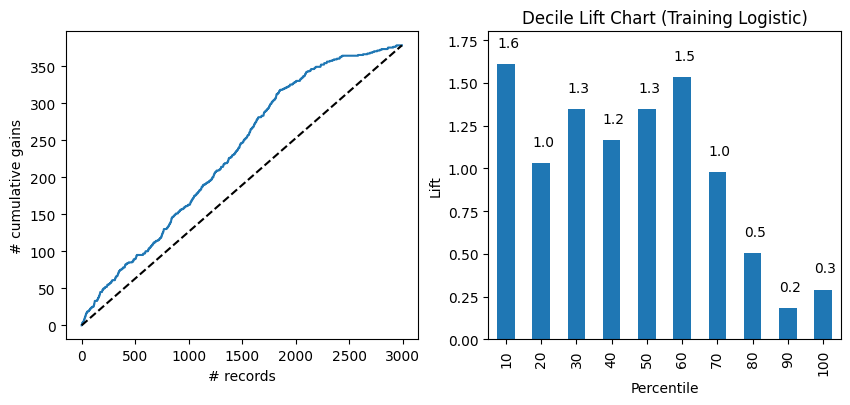

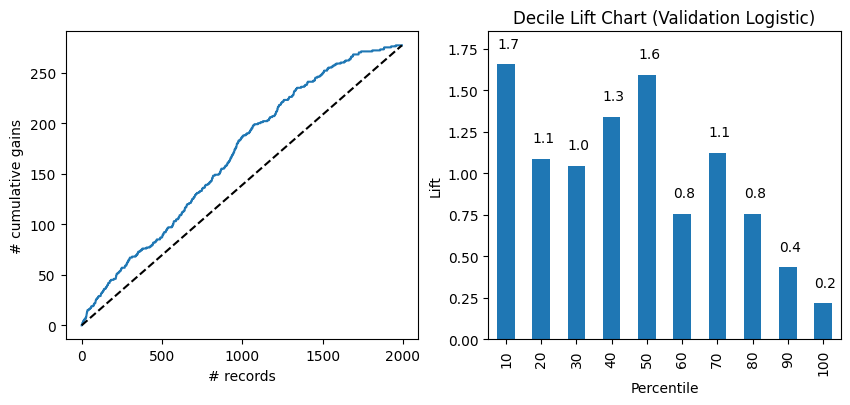

In [32]:
proba = Airline_One_logistic.predict_proba(X_scaled_train)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_One_logistic.predict(X_scaled_train) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Training Logistic)')
plt.show()
proba =  Airline_One_logistic.predict_proba(X_scaled_valid)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_One_logistic.predict(X_scaled_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation Logistic)')
plt.show()

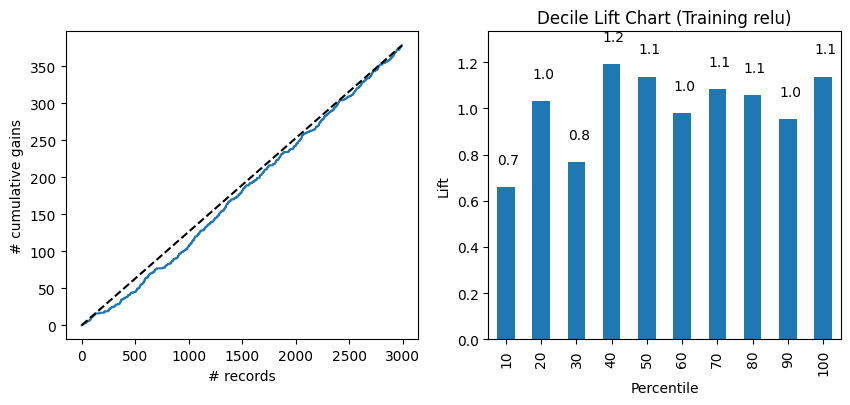

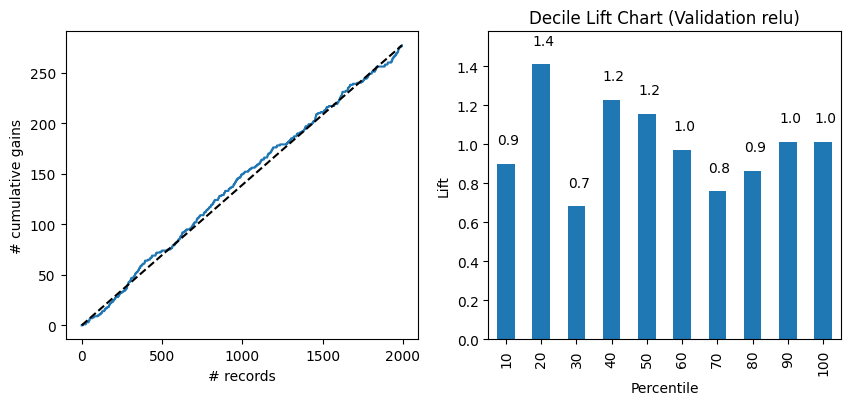

In [33]:
proba = Airline_One_relu.predict_proba(X_scaled_train)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_One_relu.predict(X_scaled_train) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Training relu)')
plt.show()
proba =  Airline_One_relu.predict_proba(X_scaled_valid)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': Airline_One_relu.predict(X_scaled_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation relu)')
plt.show()

It spread the lift out from the first decile for both Logistic and Relu. There is very little difference between the training and validation set in the logstic activation but the top 10% of records are still the ones most likely to purchase service by a noteable magnitude. Relu has been affectd more as the lift distribution has spread out much more amongst the later deciles and in a strange turn of events the records that are less likely to purchase service have a higher magnitude of getting service. There might be some level of overfitting that has damaged the Relu activations ability to robustly classify new records. 

__d.__ What sort of information, if any, is provided about the eﬀects of the various variables?

The black box nature of the neural net only allows us to see what variables can go in and what comes out as an aoutput. We do not see the effects each variable has. 

__e.__ Use GridSearchCV() to search for the number of nodes with the best score in a single layer of hidden nodes. 

In [35]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(X_scaled_train, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.873621029474989
Best parameters:  {'hidden_layer_sizes': 1}


# 4: Car Sales.

Consider the data on used cars (_ToyotaCorolla.csv_) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifcations. The goal is to predict the price of a used Toyota Corolla based on its specifcations. You will need <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">sklearn.neural_network.MLPRegressor</a> so review this documentation first. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>
__a.__ Fit a neural network model to the data. Use a single hidden layer with 2 nodes. Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Use the scikit-learn transformer _MinMaxScaler()_ to scale numerical variables to the range [0, 1]. Use separate transformer for the input and output data. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>
<pre>    
# Use the training data to learn the transformation (see Table 7.2 in DMBA) rescaling the entire data (numerical variables only) to [0, 1]. 
scaleInput = MinMaxScaler(feature_range=(0, 1), clip=True)
scaleOutput = MinMaxScaler(feature_range=(0, 1), clip=True)
# clip=True to clip transformed values of held-out data to provided feature range
# Do not scale binary dummy variables.
</pre>
<p>    
To create the dummy variables, use the pandas function pd.get_dummies(). Record the RMS error for the training data and the validation data. Repeat the process, changing the number of hidden layers and nodes to {single layer with 5 nodes}, {two layers, 5 nodes in each layer}.
<p>
    
<pre>
From the textbook: "Using the Output for Prediction and Classification - When the neural network is used for predicting a numerical outcome variable, MLPRegressor() uses an identity activation function (i.e., no activation function). Both predictor and outcome variables should be scaled to a [0, 1] interval before training the network. The output will therefore also be on a [0, 1] scale. To transform the prediction back to the original y units, which were in the range [a, b], we multiply the network output by (b − a) and add a."
To transform the prediction back to the original y units, use <a href="https://stackoverflow.com/questions/59771061/using-inverse-transform-minmaxscaler-from-scikit-learn-to-force-a-dataframe-be-i">inverse_transform</a>.

Example:

#Create new data
new_data = pd.DataFrame(np.array([[8,20],[11,2],[5,3]]))
new_data

# Create a Scaler for the new data
scaler_new_data = MinMaxScaler() 
# Trasform new data in the [0-1] range
scaled_new_data = scaler_new_data.fit_transform(new_data)
scaled_new_data

# Inverse transform new data from [0-1] to [min, max] of data
inver_new_data = scaler_new_data.inverse_transform(scaled_new_data)
inver_new_data

</pre>



In [90]:
# load the data
car_df = pd.read_csv(DATA / 'ToyotaCorolla.csv')
car_df = car_df.dropna()
subset = ['Age_08_04','KM',
       'Fuel_Type', 'HP', 'Automatic','Doors',
       'Quarterly_Tax', 'Mfr_Guarantee',
       'Guarantee_Period',
       'Airco', 'Automatic_airco', 'CD_Player',
       'Powered_Windows', 'Sport_Model','Tow_Bar', 'Price']
car_df = car_df[subset]
outcome = 'Price'


In [92]:
car_df.dtypes

Age_08_04            int64
KM                   int64
Fuel_Type           object
HP                   int64
Automatic            int64
Doors                int64
Quarterly_Tax        int64
Mfr_Guarantee        int64
Guarantee_Period     int64
Airco                int64
Automatic_airco      int64
CD_Player            int64
Powered_Windows      int64
Sport_Model          int64
Tow_Bar              int64
Price                int64
dtype: object

In [93]:
car_df['Fuel_Type'] = car_df['Fuel_Type'].astype('category')
car_df = pd.get_dummies(car_df, columns= ['Fuel_Type'], drop_first=True)
nonDummy = ['Age_08_04', 'KM', 'HP', 'Doors', 'Quarterly_Tax', 'Guarantee_Period']
predictors = [c for c in car_df.columns if c != outcome]

In [94]:
predictors

['Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'Doors',
 'Quarterly_Tax',
 'Mfr_Guarantee',
 'Guarantee_Period',
 'Airco',
 'Automatic_airco',
 'CD_Player',
 'Powered_Windows',
 'Sport_Model',
 'Tow_Bar',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol']

In [95]:
X = car_df[predictors]
y = car_df[outcome]
minMaxIn = MinMaxScaler(feature_range=(0, 1), clip=True)
minMaxOut = MinMaxScaler(feature_range=(0, 1), clip=True)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.6, random_state= 1)

X_scaled_train = train_X.copy()
X_scaled_valid = valid_X.copy()
X_scaled_train[nonDummy] = minMaxIn.fit_transform(train_X[nonDummy])
X_scaled_valid[nonDummy] = minMaxIn.transform(valid_X[nonDummy])

y_scaled_train = train_y.to_frame()
y_scaled_valid = valid_y.to_frame()
y_scaled_train =  minMaxOut.fit_transform(y_scaled_train)
y_scaled_valid =  minMaxOut.transform(y_scaled_valid)

In [108]:
Car_NN_Logistic = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
Car_NN_Logistic.fit(X_scaled_train, y_scaled_train.ravel())
Car_NN_Relu = MLPRegressor(hidden_layer_sizes=(2), activation='relu', solver='lbfgs', random_state=1, max_iter=10000)
Car_NN_Relu.fit(X_scaled_train, y_scaled_train.ravel())

MLPRegressor(hidden_layer_sizes=2, max_iter=10000, random_state=1,
             solver='lbfgs')

In [109]:
def get_inv_trn(scaler_y, scaled_y, scaled_X, reg):
  y_actual = scaler_y.inverse_transform(scaled_y).ravel()
  y_pred = scaler_y.inverse_transform(([reg.predict(scaled_X)])).ravel()
  return y_actual, y_pred

def get_reg_sum (scaler_y, scaled_train_y, scaled_train_X, scaled_valid_y, scaled_valid_X, reg):
  y_actual, y_pred = get_inv_trn(scaler_y, scaled_train_y, scaled_train_X, reg)
  print("Training:")
  regressionSummary (y_pred, y_actual)
  print("\nValidation:")
  y_actual, y_pred = get_inv_trn(scaler_y, scaled_valid_y, scaled_valid_X, reg)
  regressionSummary (y_pred, y_actual)

def get_rmse(scaler_y, scaled_train_y, scaled_train_X, scaled_valid_y, scaled_valid_X, reg):
  from sklearn.metrics import mean_squared_error
  y_actual, y_pred = get_inv_trn(scaler_y, scaled_train_y, scaled_train_X, reg)
  train_rsme = mean_squared_error(y_actual, y_pred, squared=False)
  y_actual, y_pred = get_inv_trn(scaler_y, scaled_valid_y, scaled_valid_X, reg)
  valid_rsme = mean_squared_error(y_actual, y_pred, squared=False)
  return train_rsme, valid_rsme

In [119]:
get_reg_sum(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, Car_NN_Logistic)

####### record RMSE ######################
rsme_metrics = {}
rsme_metrics['1 hidden layer with 2 nodes log'] = get_rmse(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, Car_NN_Logistic)

Training:

Regression statistics

                      Mean Error (ME) : -1.5465
       Root Mean Squared Error (RMSE) : 1094.7029
            Mean Absolute Error (MAE) : 819.5200
          Mean Percentage Error (MPE) : -0.0093
Mean Absolute Percentage Error (MAPE) : 7.9195

Validation:

Regression statistics

                      Mean Error (ME) : -52.2631
       Root Mean Squared Error (RMSE) : 1042.6588
            Mean Absolute Error (MAE) : 821.7901
          Mean Percentage Error (MPE) : -0.5446
Mean Absolute Percentage Error (MAPE) : 8.1355


In [120]:
get_reg_sum(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, Car_NN_Relu)

####### record RMSE ######################

rsme_metrics['1 hidden layer with 2 nodes Relu'] = get_rmse(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, Car_NN_Relu)

Training:

Regression statistics

                      Mean Error (ME) : 2.3413
       Root Mean Squared Error (RMSE) : 1384.9774
            Mean Absolute Error (MAE) : 1046.6395
          Mean Percentage Error (MPE) : 0.0659
Mean Absolute Percentage Error (MAPE) : 10.0226

Validation:

Regression statistics

                      Mean Error (ME) : 9.3240
       Root Mean Squared Error (RMSE) : 1436.7923
            Mean Absolute Error (MAE) : 1104.1593
          Mean Percentage Error (MPE) : 0.0214
Mean Absolute Percentage Error (MAPE) : 10.6785


i. What happens to the RMS error for the training data as the number of layers and nodes increases? 

In [112]:
#single layer, 5 nodes
regOneLog = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', max_iter=10000, random_state=1)
regOneLog.fit(X_scaled_train, y_scaled_train.ravel())
regOneRelu = MLPRegressor(hidden_layer_sizes=(5), activation='relu', solver='lbfgs', max_iter=10000, random_state=1)
regOneRelu.fit(X_scaled_train, y_scaled_train.ravel())

MLPRegressor(hidden_layer_sizes=5, max_iter=10000, random_state=1,
             solver='lbfgs')

In [121]:
get_reg_sum(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regOneLog)
####### record RMSE ######################
rsme_metrics['1 hidden layer with 5 nodes log'] = get_rmse(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regOneLog)

Training:

Regression statistics

                      Mean Error (ME) : -0.5524
       Root Mean Squared Error (RMSE) : 1115.1943
            Mean Absolute Error (MAE) : 821.2848
          Mean Percentage Error (MPE) : -0.1093
Mean Absolute Percentage Error (MAPE) : 7.9139

Validation:

Regression statistics

                      Mean Error (ME) : -68.3600
       Root Mean Squared Error (RMSE) : 1091.3885
            Mean Absolute Error (MAE) : 847.8894
          Mean Percentage Error (MPE) : -0.8712
Mean Absolute Percentage Error (MAPE) : 8.4012


In [122]:
get_reg_sum(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regOneRelu)
####### record RMSE ######################
rsme_metrics['1 hidden layer with 5 nodes relu'] = get_rmse(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regOneRelu)

Training:

Regression statistics

                      Mean Error (ME) : 0.5713
       Root Mean Squared Error (RMSE) : 1052.4640
            Mean Absolute Error (MAE) : 788.9877
          Mean Percentage Error (MPE) : -0.0144
Mean Absolute Percentage Error (MAPE) : 7.6581

Validation:

Regression statistics

                      Mean Error (ME) : -67.2562
       Root Mean Squared Error (RMSE) : 1046.9946
            Mean Absolute Error (MAE) : 822.7390
          Mean Percentage Error (MPE) : -0.7369
Mean Absolute Percentage Error (MAPE) : 8.1869


In [124]:
#2 layers, 5 nodes
regTwoLog = MLPRegressor(hidden_layer_sizes=(5,5), activation='logistic', solver='lbfgs', random_state=1)
regTwoLog.fit(X_scaled_train, y_scaled_train.ravel())
regTwoRelu = MLPRegressor(hidden_layer_sizes=(5,5), activation='relu', solver='lbfgs', random_state=1)
regTwoRelu.fit(X_scaled_train, y_scaled_train.ravel())

MLPRegressor(hidden_layer_sizes=(5, 5), random_state=1, solver='lbfgs')

In [125]:
get_reg_sum(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regOneLog)
####### record RMSE ######################
rsme_metrics['2 hidden layer with 5 nodes log'] = get_rmse(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regTwoLog)
rsme_metrics['2 hidden layer with 5 nodes relu'] = get_rmse(minMaxOut, y_scaled_train, X_scaled_train, y_scaled_valid, X_scaled_valid, regTwoRelu)

Training:

Regression statistics

                      Mean Error (ME) : -0.5524
       Root Mean Squared Error (RMSE) : 1115.1943
            Mean Absolute Error (MAE) : 821.2848
          Mean Percentage Error (MPE) : -0.1093
Mean Absolute Percentage Error (MAPE) : 7.9139

Validation:

Regression statistics

                      Mean Error (ME) : -68.3600
       Root Mean Squared Error (RMSE) : 1091.3885
            Mean Absolute Error (MAE) : 847.8894
          Mean Percentage Error (MPE) : -0.8712
Mean Absolute Percentage Error (MAPE) : 8.4012


In [126]:
rsme_metrics

{'1 hidden layer with 2 nodes log': (1094.702910321339, 1042.6588402143543),
 '1 hidden layer with 2 nodes Relu': (1384.9774344253644, 1436.7922528851022),
 '1 hidden layer with 5 nodes log': (1115.1943240867065, 1091.3884799823372),
 '1 hidden layer with 5 nodes relu': (1052.4639579689974, 1046.9945981395413),
 '2 hidden layer with 5 nodes log': (1131.666488736682, 1103.2808035473977),
 '2 hidden layer with 5 nodes relu': (1076.438646057477, 1059.8636356191864)}

Increasing the number of nodes and layers increased the RSME of the models using the logistic activation but had the opposite effect on the model using the Relu activation. 

ii. What happens to the RMS error for the validation data?

It increased with the number of nodes and layes for the Logistic models. It decresed with an increase in nodes and layers. 

iii. Comment on the appropriate number of layers and nodes for this application

That depends on the activation we are using. If we want to use Logistic then 1 would be best just based on the RSME, but if we go into relu we could keep increasing the number of layers. That however comes with a level of concern for overfitting at a certain point.  

__b.__ Use GridSearchCV() to search for the number of nodes with the best score in a single layer of hidden nodes.

In [129]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPRegressor(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=10, n_jobs=-1, return_train_score=True)
gridSearch.fit(X_scaled_train, y_scaled_train.ravel())
#gridSearch.cv_results_
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8979984988640874
Best parameters:  {'hidden_layer_sizes': 9}


In [130]:
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         1         0.894474        0.025904
1                         2         0.892491        0.030194
2                         3         0.897508        0.027038
3                         4         0.892597        0.028694
4                         5         0.893198        0.026854
5                         6         0.892904        0.023918
6                         7         0.894194        0.029395
7                         8         0.889546        0.029819
8                         9         0.897998        0.028109
9                        10         0.889740        0.026538
10                       11         0.888022        0.032858
11                       12         0.888483        0.029803
12                       13         0.881194        0.030223
13                       14         0.874782        0.033504
14                       15         0.878653        0.031085
15                      